In [3]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/Users/kimjuhwan/Desktop/data/human_activity_recognition_using_smartphones/UCI_HAR_Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

print("## 학습 피처 데이터 정보 ##")
print(X_train.info())

## 학습 피처 데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [5]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [6]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


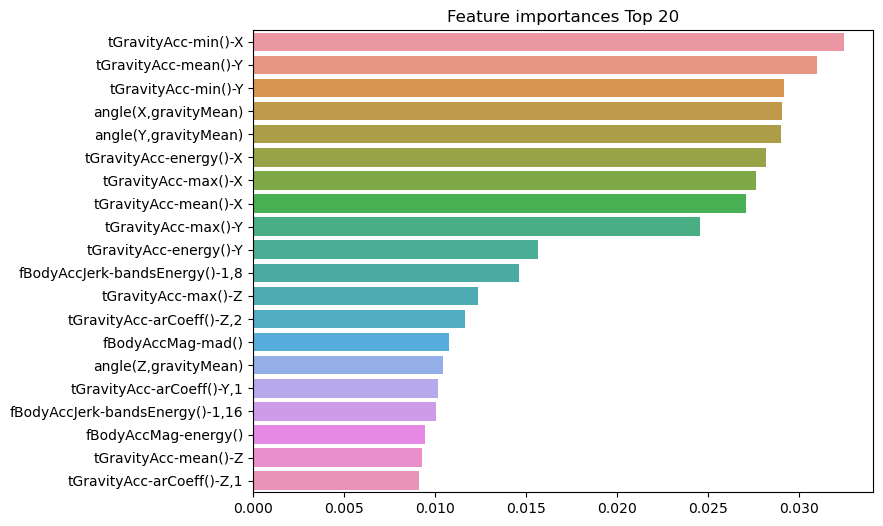

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [8]:
#SVM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9504580929759077
[[488   5   3   0   0   0]
 [ 20 451   0   0   0   0]
 [ 10  26 384   0   0   0]
 [  0   2   0 438  51   0]
 [  0   0   0  29 503   0]
 [  0   0   0   0   0 537]]


In [9]:
#LR
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9579233118425518
[[492   1   3   0   0   0]
 [ 25 444   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 431  57   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_dt= DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8595181540549711
[[448  24  24   0   0   0]
 [ 74 367  30   0   0   0]
 [ 23  46 351   0   0   0]
 [  0   0   0 373 118   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


In [11]:
X_train, y_train

(      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
 0              0.288585          -0.020294          -0.132905   
 1              0.278419          -0.016411          -0.123520   
 2              0.279653          -0.019467          -0.113462   
 3              0.279174          -0.026201          -0.123283   
 4              0.276629          -0.016570          -0.115362   
 ...                 ...                ...                ...   
 7347           0.299665          -0.057193          -0.181233   
 7348           0.273853          -0.007749          -0.147468   
 7349           0.273387          -0.017011          -0.045022   
 7350           0.289654          -0.018843          -0.158281   
 7351           0.351503          -0.012423          -0.203867   
 
       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
 0            -0.995279         -0.983111         -0.913526         -0.995112   
 1            -0.998245         -0.975300   

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,stratify=  y_train)

In [21]:
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

y_val_array = np.array(y_val)
val_set = np.c_[X_val, y_val_array]

X_train, y_train = split_sequences(train_set, 25)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 25)
print(X_test.shape, y_test.shape)

X_val, y_val = split_sequences(val_set, 25)
print(X_val.shape, y_val.shape)

(5490, 25, 561) (5490,)
(2923, 25, 561) (2923,)
(1814, 25, 561) (1814,)


In [23]:
print(X_train.shape, y_train.shape)

(5490, 25, 561) (5490,)


In [25]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

2023-10-06 11:05:56.655455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(5490, 7)
(2923, 7)
(1814, 7)


In [26]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

25 561 7


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [29]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 64)            107776    
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 dense (Dense)               (None, 128)               188544    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 297,223
Trainable params: 297,223
Non-trainable params: 0
_________________________________________________________________


2023-10-06 11:07:26.863866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))

Epoch 1/10
172/172 [==============================] - 2s 8ms/step - loss: 1.0905 - accuracy: 0.5319 - val_loss: 0.5810 - val_accuracy: 0.7376
Epoch 2/10
172/172 [==============================] - 1s 6ms/step - loss: 0.3188 - accuracy: 0.8654 - val_loss: 0.4342 - val_accuracy: 0.8236
Epoch 3/10
172/172 [==============================] - 1s 6ms/step - loss: 0.1686 - accuracy: 0.9346 - val_loss: 0.2611 - val_accuracy: 0.9008
Epoch 4/10
172/172 [==============================] - 1s 6ms/step - loss: 0.0844 - accuracy: 0.9705 - val_loss: 0.2723 - val_accuracy: 0.9008
Epoch 5/10
172/172 [==============================] - 1s 6ms/step - loss: 0.0654 - accuracy: 0.9781 - val_loss: 0.3074 - val_accuracy: 0.9035
Epoch 6/10
172/172 [==============================] - 1s 6ms/step - loss: 0.0469 - accuracy: 0.9827 - val_loss: 0.3278 - val_accuracy: 0.8914
Epoch 7/10
172/172 [==============================] - 1s 6ms/step - loss: 0.0931 - accuracy: 0.9681 - val_loss: 0.4750 - val_accuracy: 0.8644
Epoch 

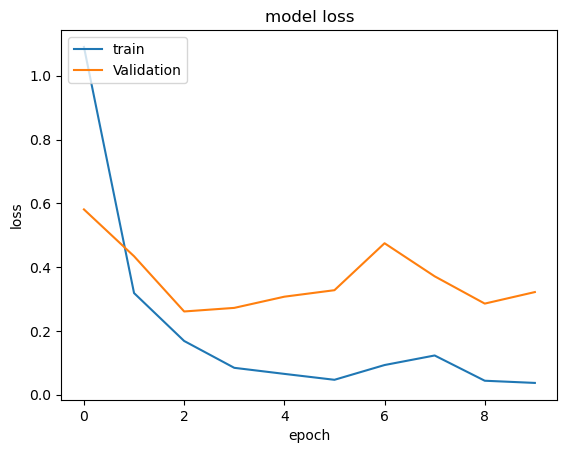

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

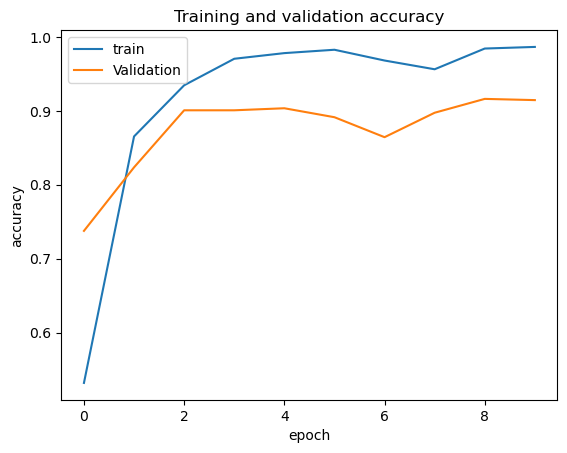

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [33]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

92/92 [==============================] - 0s 3ms/step


(2923, 1)

In [36]:
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

In [37]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)

results_summarizer(y_true, y_pred)

Accuracy Score: 92.1998%
Precision Score: 92.4186%
Recall Score: 92.1631%
F_1 Score: 92.2247%
